In [2]:
# importing data into python
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb

data = pd.read_csv('E:\mask_rcnn\MLR_model\data.csv')
data['Patient_ID'] = data['Patient_ID'].map(lambda x: x.lstrip('SBWCRC00'))
data['Healthy_Tumour'] = data['Healthy_Tumour'].map({'Healthy': 'H', 'Tumour': 'T'})
data['Sample_ID'] = data["Patient_ID"] + data["Healthy_Tumour"]
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.loc[:, ~data.columns.str.contains('^Area')]

# split the organoid_id_brightfield to have a column which indicates which well an organoid is coming from
data['Well'] = data['Organoid_ID_Brightfield'].str.split('.',expand=True)[0]#


# place sample_id col first

cols = list(data)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Well')))
cols.insert(0, cols.pop(cols.index('Sample_ID')))

data = data.loc[:, cols]

data

,Sample_ID,Well,Patient_ID,Healthy_Tumour,Morphology,Organoid_ID_Brightfield,Organoid_ID_Detection,Nuclei
0,7H,1,7,H,Cystic,1.1.1,146,82
1,7H,1,7,H,Cystic,1.1.2,153,69
2,7H,1,7,H,Cystic,1.1.3,148,60
3,7H,1,7,H,Cystic,1.1.4,152,83
4,7H,1,7,H,Cystic,1.1.5,153,105
...,...,...,...,...,...,...,...,...
4373,46T,3,46,T,Budded,3.11.4,NaN,61
4374,46T,3,46,T,Budded,3.11.5,161,115
4375,46T,3,46,T,Budded,3.12.1,176,169
4376,46T,3,46,T,Budded,3.12.2,175,110


In [3]:


data = data[data['Organoid_ID_Detection'].notna()]
data = data[data.Nuclei != 'ND']
data = data[data.Organoid_ID_Detection != '??']
data = data[data.Organoid_ID_Detection != 'na']
data = data.rename(columns={'Organoid_ID_Detection': 'Organoid_ID'})
# fix error
data.Organoid_ID = data.Organoid_ID.replace('1`45', 145)
data.Organoid_ID = data.Organoid_ID.astype(int)
data.Nuclei = data.Nuclei.astype(int)

data

,Sample_ID,Well,Patient_ID,Healthy_Tumour,Morphology,Organoid_ID_Brightfield,Organoid_ID,Nuclei
0,7H,1,7,H,Cystic,1.1.1,146,82
1,7H,1,7,H,Cystic,1.1.2,153,69
2,7H,1,7,H,Cystic,1.1.3,148,60
3,7H,1,7,H,Cystic,1.1.4,152,83
4,7H,1,7,H,Cystic,1.1.5,153,105
...,...,...,...,...,...,...,...,...
4372,46T,3,46,T,Budded,3.11.3,163,142
4374,46T,3,46,T,Budded,3.11.5,161,115
4375,46T,3,46,T,Budded,3.12.1,176,169
4376,46T,3,46,T,Budded,3.12.2,175,110


In [4]:
import glob

#get paths of all csv

csv_paths = [x for x in glob.glob(r"E:\mask_rcnn\MLR_model\area_datasets\*.csv")]

# ignore paths which cotain 'VAL'

training_csv_paths = [x for x in csv_paths if 'VAL' not in x]
val_csv_pths = [x for x in csv_paths if 'VAL' in x]




In [5]:
#testing merging

# test_path = training_csv_paths[71]
# sample_id = test_path.split('\\')[4].split('_')[0]
# well = test_path.split('\\')[4].split('_')[1][-1]
# sample_areas = pd.read_csv(training_csv_paths[71])

# pd.merge(data[data.Sample_ID.isin([sample_id])][data.Well.isin([well])], sample_areas, on=['Organoid_ID'])

In [6]:
output_list = []

for csv in training_csv_paths:
    sample_id = csv.split('\\')[4].split('_')[0]
    well = csv.split('\\')[4].split('_')[1][-1]
    sample_areas = pd.read_csv(csv)
    temp_df = pd.merge(data[data.Sample_ID.isin([sample_id])][data.Well.isin([well])], sample_areas, on=['Organoid_ID'])
    output_list.append(temp_df)

    

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


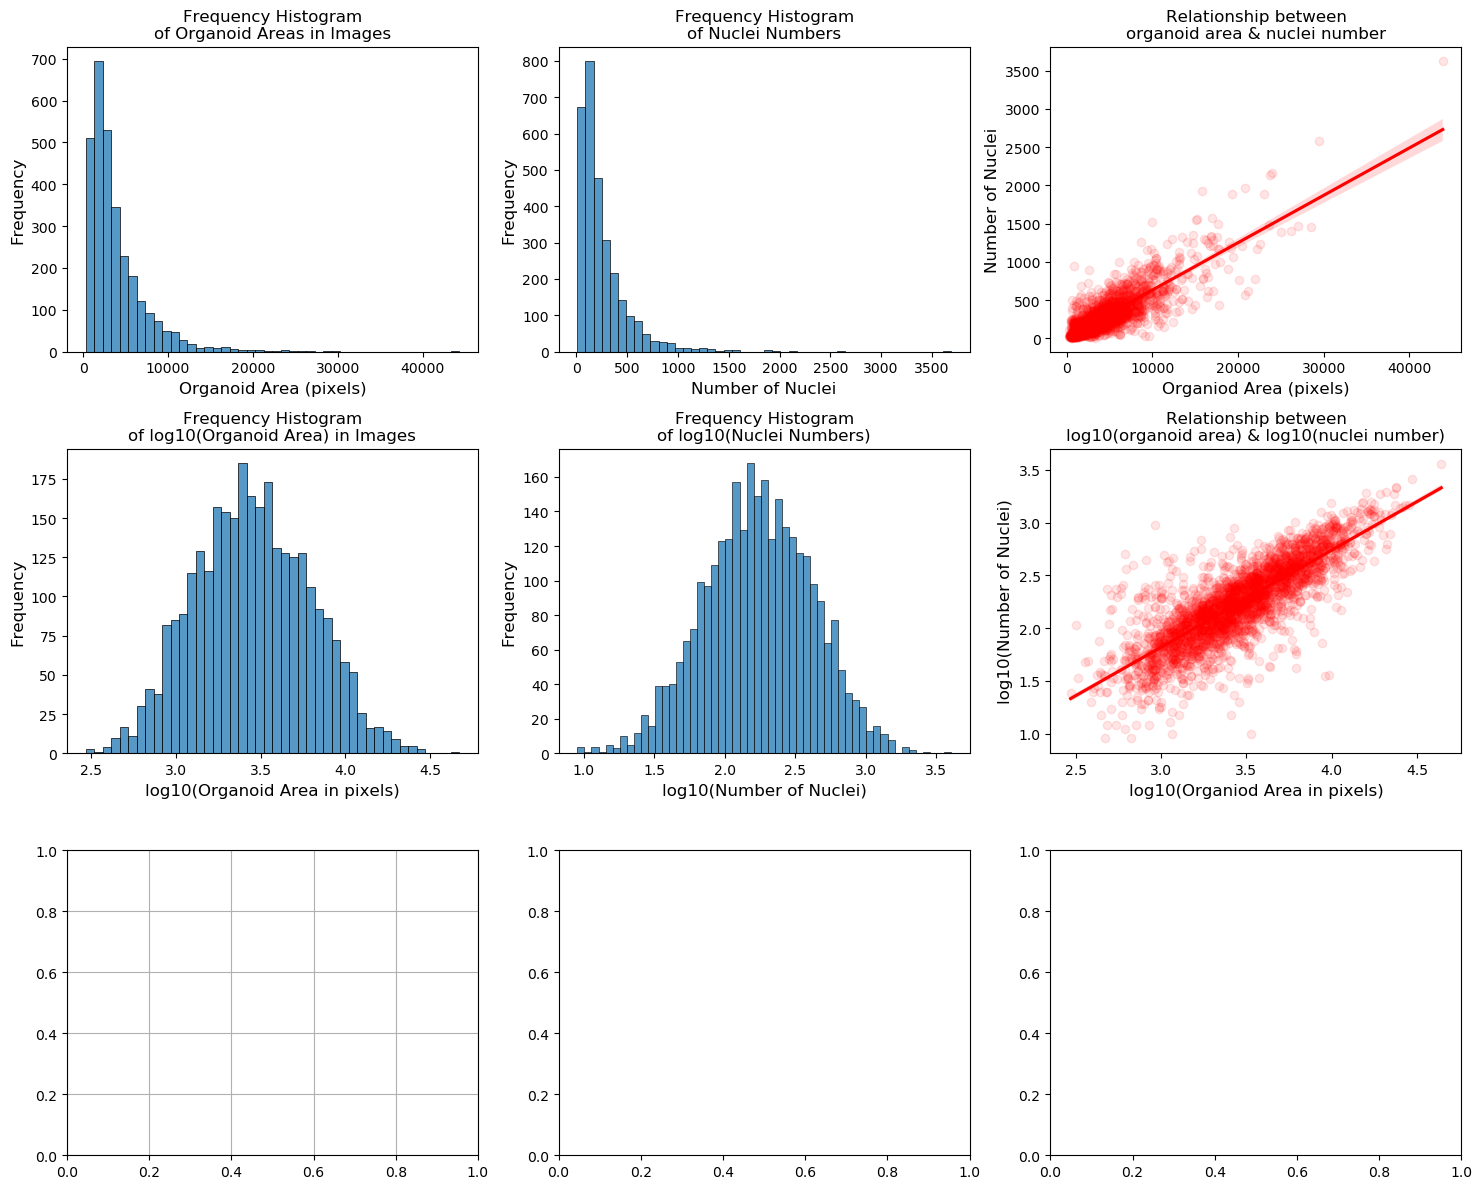

In [7]:
combined_data = pd.concat(output_list, axis=0)
combined_data

# plotting distributions beforing transformations
import matplotlib.pyplot as plt 
import seaborn as sn

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
plt.rcParams['axes.grid'] = False



plt.subplot(3, 3, 1)
sn.histplot(data=combined_data, x="Area (pixels)", binwidth=1000)
plt.title('Frequency Histogram\nof Organoid Areas in Images', fontsize = 12)
plt.xlabel('Organoid Area (pixels)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.subplot(3, 3, 2)
sn.histplot(data=combined_data, x="Nuclei", binwidth=80)
plt.title('Frequency Histogram\nof Nuclei Numbers', fontsize = 12)
plt.xlabel('Number of Nuclei', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)


sn.regplot(data = combined_data, x ='Area (pixels)', y='Nuclei', ax=axes[0, 2], color = 'red',scatter_kws= {'alpha': 0.1})
axes[0, 2].set_xlabel('Organiod Area (pixels)', fontsize=12)
axes[0, 2].set_ylabel('Number of Nuclei', fontsize=12)
axes[0, 2].set_title('Relationship between\norganoid area & nuclei number', fontsize = 12)

# Both cell number and circumference are right-skewed (that is clustered around low values) 
# as such it might be worth performing some transformations to the dataset
# their relationship is also non-linear
# log transformation should solve this


combined_data['Area (pixels)'] = np.log10(combined_data['Area (pixels)']) 
combined_data['Nuclei'] = np.log10(combined_data['Nuclei']) 
combined_data

plt.subplot(3, 3, 4)
sn.histplot(data=combined_data, x="Area (pixels)", binwidth=0.05)
plt.title('Frequency Histogram\nof log10(Organoid Area) in Images', fontsize = 12)
plt.xlabel('log10(Organoid Area in pixels)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.subplot(3, 3, 5)
sn.histplot(data=combined_data, x="Nuclei", binwidth=0.05)
plt.title('Frequency Histogram\nof log10(Nuclei Numbers)', fontsize = 12)
plt.xlabel('log10(Number of Nuclei)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)


sn.regplot(data = combined_data, x ='Area (pixels)', y='Nuclei', ax=axes[1, 2], color = 'red',scatter_kws= {'alpha': 0.1})
axes[1, 2].set_xlabel('log10(Organiod Area in pixels)', fontsize=12)
axes[1, 2].set_ylabel('log10(Number of Nuclei)', fontsize=12)
axes[1, 2].set_title('Relationship between\nlog10(organoid area) & log10(nuclei number)', fontsize = 12)

plt.subplot(3, 3, 7)
plt.grid(True)
fig.tight_layout()
plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\effect_of_transportmation_on_data.png', dpi = 600)
plt.show()







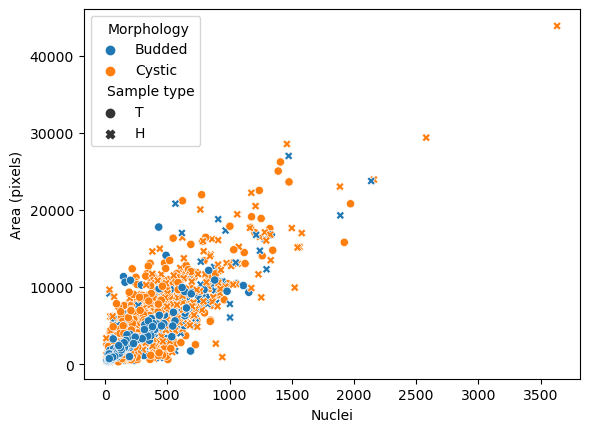

In [8]:
#plot deviation vs organoid area
data_for_temp_graph = combined_data
data_for_temp_graph['Nuclei'] = 10**data_for_temp_graph['Nuclei']
data_for_temp_graph['Area (pixels)'] = 10**data_for_temp_graph['Area (pixels)']
data_for_temp_graph = data_for_temp_graph.rename(columns={"Healthy_Tumour": "Sample type"})


fig1, ax1 = plt.subplots()
sn.scatterplot(data=data_for_temp_graph, x="Nuclei", y="Area (pixels)", hue = 'Morphology', style = 'Sample type')
plt.show()

In [9]:
combined_data['Morphology'].value_counts()

Cystic    1902
Budded    1083
Name: Morphology, dtype: int64

In [10]:
combined_data.columns

Index(['Sample_ID', 'Well', 'Patient_ID', 'Healthy_Tumour', 'Morphology',
       'Organoid_ID_Brightfield', 'Organoid_ID', 'Nuclei', 'Area (pixels)'],
      dtype='object')

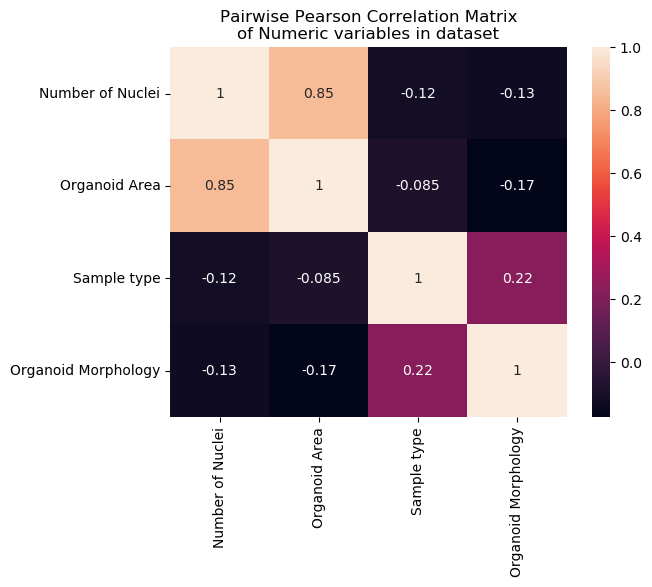

In [11]:
import seaborn as sn
# inital exploratory correlation matrix 
# convert categorical variables to binary numeric variables

sample_type = pd.get_dummies(combined_data['Healthy_Tumour'])
organoid_type  = pd.get_dummies(combined_data['Morphology'])

combined_data['Dummy_tissue_type'] = sample_type['T']
combined_data['Dummy_morphology'] = organoid_type['Budded']

data_numerical = combined_data.drop(['Sample_ID', 'Well', 'Patient_ID','Healthy_Tumour',
                                     'Morphology','Organoid_ID_Brightfield',
                                    'Organoid_ID'], axis=1)

  

# Healthy = 0, Tumour = 1
# Spherical = 0, Irregular = 1

data_numerical = combined_data.drop(['Sample_ID', 'Well', 'Patient_ID','Healthy_Tumour',
                                     'Morphology','Organoid_ID_Brightfield',
                                    'Organoid_ID'], axis=1)
data_numerical = data_numerical.rename(columns={"Dummy_morphology": "Organoid Morphology", "Dummy_tissue_type": "Sample type"})


data_numerical.rename(columns={'Nuclei': 'Number of Nuclei', 'Area (pixels)': 'Organoid Area'}, inplace=True)


corr_matrix = data_numerical.corr(method = 'pearson')

sn.heatmap(corr_matrix, annot=True)
plt.title('Pairwise Pearson Correlation Matrix\nof Numeric variables in dataset')
plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\correlation_matrix_of_numeric_variables.png', dpi = 600,bbox_inches = "tight")
plt.show()

In [12]:
from scipy.stats import pearsonr
pval = data_numerical.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr_matrix.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
pval

,Number of Nuclei,Organoid Area,Sample type,Organoid Morphology
Number of Nuclei,0.000000e+00,0.000000e+00,2.437289e-10,8.337794e-13
Organoid Area,0.000000e+00,0.000000e+00,3.336351e-06,6.114642e-22
Sample type,2.437289e-10,3.336351e-06,0.000000e+00,1.960155e-35
Organoid Morphology,8.337794e-13,6.114642e-22,1.960155e-35,0.000000e+00


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
data_numerical.columns

Index(['Number of Nuclei', 'Organoid Area', 'Sample type',
       'Organoid Morphology'],
      dtype='object')

In [14]:
#define predictor and response variables
x = data_numerical[['Organoid Area', 'Sample type', 'Organoid Morphology']]
y = data_numerical['Number of Nuclei']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
mlr = sm.OLS(y, x).fit()

Intercept: 
 21.03613040984328
Coefficients: 
 [  0.0620251  -25.51118818  15.83102165]


In [15]:
import pickle
# save the model to disk
filename = r'E:\mask_rcnn\MLR_model\mlr_model.sav'
pickle.dump(mlr, open(filename, 'wb'))

In [30]:
#load model from disk
loaded_model = pickle.load(open(filename, 'rb'))
predictions = mlr.predict(x) 
 
print_model = mlr.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Number of Nuclei   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     2683.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:04:36   Log-Likelihood:                -18805.
No. Observations:                2985   AIC:                         3.762e+04
Df Residuals:                    2981   BIC:                         3.764e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.0361    

0     183.723718
1     123.993547
2     159.720005
3      78.839273
4      68.295006
         ...    
14    184.033844
15     67.426655
16    143.655503
17    160.836456
18     56.324162
Length: 2985, dtype: float64

In [17]:
#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-10)

#view mean absolute error
mean(absolute(scores))

82.91165838988418

In [31]:
# add the predictions to the dataframe
data_with_predications = pd.concat([data_numerical, predictions], axis = 1)
data_with_predications = data_with_predications.rename(columns={0: "Nuclei_prediction"})
data_with_predications

,Number of Nuclei,Organoid Area,Sample type,Organoid Morphology,Nuclei_prediction
0,111.0,2779.0,1,1,183.723718
1,70.0,1816.0,1,1,123.993547
2,99.0,2392.0,1,1,159.720005
3,34.0,1088.0,1,1,78.839273
4,40.0,918.0,1,1,68.295006
...,...,...,...,...,...
14,153.0,2784.0,1,1,184.033844
15,61.0,904.0,1,1,67.426655
16,123.0,2133.0,1,1,143.655503
17,110.0,2410.0,1,1,160.836456


In [33]:
# scatter plot of data
# converting numeric variables back to categorical

data_with_predications['Organoid Morphology'] = np.where(data_with_predications['Organoid Morphology'] == 0, 
                                                   'Cystic', 
                                                   data_with_predications['Organoid Morphology'])

data_with_predications['Organoid Morphology'] = np.where(data_with_predications['Organoid Morphology'] == '1', 
                                                   'Budded', 
                                                   data_with_predications['Organoid Morphology'])

data_with_predications['Sample type'] = np.where(data_with_predications['Sample type'] == 0, 
                                                   'Healthy', 
                                                   data_with_predications['Sample type'])

data_with_predications['Sample type'] = np.where(data_with_predications['Sample type'] == '1', 
                                                   'Tumour', 
                                                   data_with_predications['Sample type'])
data_with_predications['real_cell_number'] = data_with_predications['Number of Nuclei'] 
data_with_predications['real_cell_number_predicition'] =  data_with_predications['Nuclei_prediction'] 

data_with_predications

,Number of Nuclei,Organoid Area,Sample type,Organoid Morphology,Nuclei_prediction,real_cell_number,real_cell_number_predicition
0,111.0,2779.0,Tumour,Budded,183.723718,111.0,183.723718
1,70.0,1816.0,Tumour,Budded,123.993547,70.0,123.993547
2,99.0,2392.0,Tumour,Budded,159.720005,99.0,159.720005
3,34.0,1088.0,Tumour,Budded,78.839273,34.0,78.839273
4,40.0,918.0,Tumour,Budded,68.295006,40.0,68.295006
...,...,...,...,...,...,...,...
14,153.0,2784.0,Tumour,Budded,184.033844,153.0,184.033844
15,61.0,904.0,Tumour,Budded,67.426655,61.0,67.426655
16,123.0,2133.0,Tumour,Budded,143.655503,123.0,143.655503
17,110.0,2410.0,Tumour,Budded,160.836456,110.0,160.836456


In [34]:


# plot deviation of predicted values from real values

data_with_predications['real_area'] = data_with_predications['Organoid Area']
data_with_predications['predicition_devition'] = data_with_predications['real_cell_number'] - data_with_predications['real_cell_number_predicition'] 
data_with_predications

,Number of Nuclei,Organoid Area,Sample type,Organoid Morphology,Nuclei_prediction,real_cell_number,real_cell_number_predicition,real_area,predicition_devition
0,111.0,2779.0,Tumour,Budded,183.723718,111.0,183.723718,2779.0,-72.723718
1,70.0,1816.0,Tumour,Budded,123.993547,70.0,123.993547,1816.0,-53.993547
2,99.0,2392.0,Tumour,Budded,159.720005,99.0,159.720005,2392.0,-60.720005
3,34.0,1088.0,Tumour,Budded,78.839273,34.0,78.839273,1088.0,-44.839273
4,40.0,918.0,Tumour,Budded,68.295006,40.0,68.295006,918.0,-28.295006
...,...,...,...,...,...,...,...,...,...
14,153.0,2784.0,Tumour,Budded,184.033844,153.0,184.033844,2784.0,-31.033844
15,61.0,904.0,Tumour,Budded,67.426655,61.0,67.426655,904.0,-6.426655
16,123.0,2133.0,Tumour,Budded,143.655503,123.0,143.655503,2133.0,-20.655503
17,110.0,2410.0,Tumour,Budded,160.836456,110.0,160.836456,2410.0,-50.836456


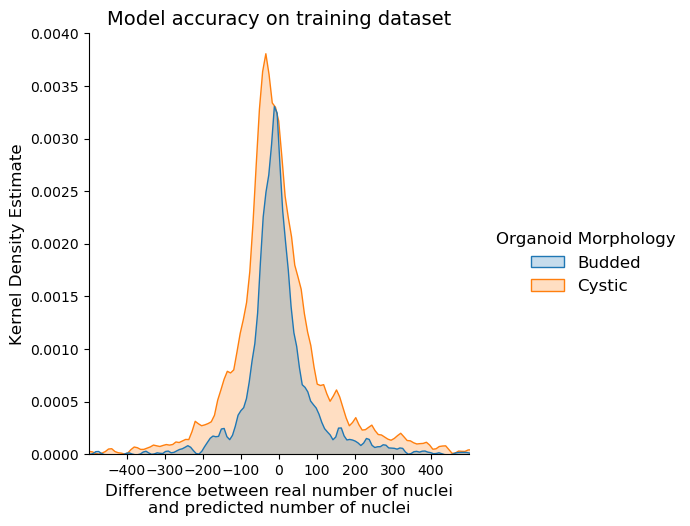

In [35]:
# Distriubtuions of model deviation
params = {'legend.fontsize': 12,
          'legend.handlelength': 2,
         'legend.title_fontsize':12}
plt.rcParams.update(params)


sn.displot(data_with_predications, x="predicition_devition", 
           hue = 'Organoid Morphology',
           kind ='kde',
           bw_adjust=.25,
          fill = True)
plt.xlim(-500,500)
plt.xticks(np.arange(-400, 500, step=100))  # Set label locations.
plt.xlabel('Difference between real number of nuclei\nand predicted number of nuclei', fontsize = 12)
plt.ylabel('Kernel Density Estimate', fontsize = 12)
plt.title('Model accuracy on training dataset', fontsize = 14)
plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\model_accuracy_on_training_dataset.png', dpi=1200,bbox_inches = "tight")

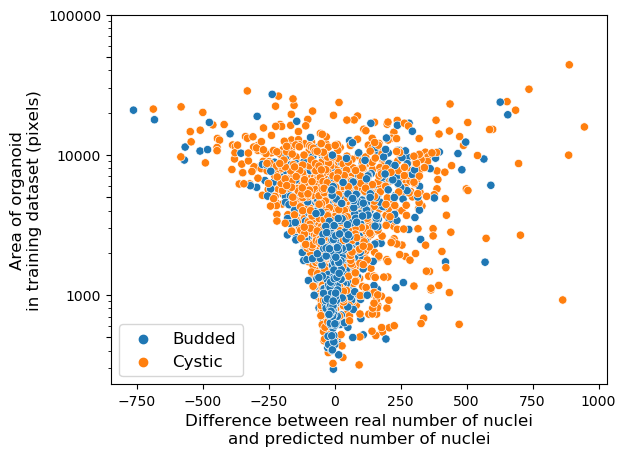

In [36]:
#plot deviation vs organoid area
fig1, ax1 = plt.subplots()
sn.scatterplot(data=data_with_predications, x="predicition_devition", y="real_area", hue = 'Organoid Morphology')
ax1.set_yscale('log')
ax1.set_yticks([500,1000,5000,10000,50000,100000])
ax1.set_yticklabels(['',1000,'',10000,'',100000])
plt.xlabel('Difference between real number of nuclei\nand predicted number of nuclei', fontsize =12 )
plt.ylabel('Area of organoid\nin training dataset (pixels)', fontsize =12 )
plt.legend(loc = 3)
plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\deviation_from_real_number_vs_organoid_area.png', dpi=1200,bbox_inches = "tight")
plt.show()

In [37]:
data_with_predications

,Number of Nuclei,Organoid Area,Sample type,Organoid Morphology,Nuclei_prediction,real_cell_number,real_cell_number_predicition,real_area,predicition_devition
0,111.0,2779.0,Tumour,Budded,183.723718,111.0,183.723718,2779.0,-72.723718
1,70.0,1816.0,Tumour,Budded,123.993547,70.0,123.993547,1816.0,-53.993547
2,99.0,2392.0,Tumour,Budded,159.720005,99.0,159.720005,2392.0,-60.720005
3,34.0,1088.0,Tumour,Budded,78.839273,34.0,78.839273,1088.0,-44.839273
4,40.0,918.0,Tumour,Budded,68.295006,40.0,68.295006,918.0,-28.295006
...,...,...,...,...,...,...,...,...,...
14,153.0,2784.0,Tumour,Budded,184.033844,153.0,184.033844,2784.0,-31.033844
15,61.0,904.0,Tumour,Budded,67.426655,61.0,67.426655,904.0,-6.426655
16,123.0,2133.0,Tumour,Budded,143.655503,123.0,143.655503,2133.0,-20.655503
17,110.0,2410.0,Tumour,Budded,160.836456,110.0,160.836456,2410.0,-50.836456


In [38]:
data_with_predications['sample_id'] = combined_data['Sample_ID']
data_with_predications['well'] = combined_data['Well']
data_with_predications['Organoid_ID'] = combined_data['Organoid_ID']
data_with_predications['Organoid_ID_Brightfield'] = combined_data['Organoid_ID_Brightfield']

data_with_predications[(data_with_predications['predicition_devition'] < -500)]

,Number of Nuclei,Organoid Area,Sample type,Organoid Morphology,Nuclei_prediction,real_cell_number,real_cell_number_predicition,real_area,predicition_devition,sample_id,well,Organoid_ID,Organoid_ID_Brightfield
1,148.0,11357.0,Tumour,Budded,715.775031,148.0,715.775031,11357.0,-567.775031,25T,4,5,4.2.1
4,160.0,10640.0,Tumour,Budded,671.303034,160.0,671.303034,10640.0,-511.303034,25T,4,13,4.5.1
7,776.0,21986.0,Tumour,Cystic,1359.208804,776.0,1359.208804,21986.0,-583.208804,33T,2,1,2.1.8
14,218.0,12374.0,Tumour,Cystic,763.023537,218.0,763.023537,12374.0,-545.023537,33T,5,204,5.3.6
33,622.0,21201.0,Tumour,Cystic,1310.519100,622.0,1310.519100,21201.0,-688.519100,35T,1,298,1.6.1
4,380.0,14628.0,Healthy,Cystic,928.339302,380.0,928.339302,14628.0,-548.339302,50H,3,57,3.1.4
17,765.0,20068.0,Healthy,Cystic,1265.755849,765.0,1265.755849,20068.0,-500.755849,50H,4,22,4.4.1
10,565.0,20828.0,Healthy,Budded,1328.725947,565.0,1328.725947,20828.0,-763.725947,54H,4,52,4.4.3
13,431.0,17796.0,Tumour,Budded,1115.154654,431.0,1115.154654,17796.0,-684.154654,54T,2,40,2.4.6
2,35.0,9175.0,Healthy,Budded,605.947450,35.0,605.947450,9175.0,-570.947450,65H,3,20,3.1.3


In [39]:
# prepare validation dataset
val_list = []

for csv in val_csv_pths:
    sample_id = csv.split('\\')[4].split('_')[0]
    well =csv.split('\\')[4].split('_')[1].split(' ')[0][-1]
    sample_areas = pd.read_csv(csv)
    temp_df = pd.merge(data[data.Sample_ID.isin([sample_id])][data.Well.isin([well])], sample_areas, on=['Organoid_ID'])
    val_list.append(temp_df)

val_data = pd.concat(val_list, axis=0)
val_data

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Sample_ID,Well,Patient_ID,Healthy_Tumour,Morphology,Organoid_ID_Brightfield,Organoid_ID,Nuclei,Area (pixels)
0,46T,1,46,T,Budded,1.1.1,0,356,944
1,46T,1,46,T,Budded,1.1.2,38,98,1414
2,46T,1,46,T,Budded,1.1.3,37,290,848
3,46T,1,46,T,Budded,1.1.4,36,67,503
4,46T,1,46,T,Budded,1.1.5,1,171,4668
...,...,...,...,...,...,...,...,...,...
46,94H,3,94,H,Cystic,3.5.8,238,102,1843
47,94H,3,94,H,Cystic,3.5.9,239,59,1481
48,94H,3,94,H,Cystic,3.5.10,243,66,1471
49,94H,3,94,H,Cystic,3.5.11,245,40,1176


In [40]:
val_data['Morphology'].value_counts()

Cystic    593
Budded    132
Name: Morphology, dtype: int64

In [44]:
import pickle
filename = r'E:\mask_rcnn\MLR_model\mlr_model.sav'
#load model from disk
loaded_model = pickle.load(open(filename, 'rb'))

sample_type = pd.get_dummies(val_data['Healthy_Tumour'])
organoid_type  = pd.get_dummies(val_data['Morphology'])

val_data['Dummy_tissue_type'] = sample_type['T']
val_data['Dummy_morphology'] = organoid_type['Budded']


val_data_numerical = val_data.drop(['Sample_ID', 'Well', 'Patient_ID','Healthy_Tumour',
                                     'Morphology','Organoid_ID_Brightfield',
                                    'Organoid_ID'], axis=1)
val_data_numerical = val_data_numerical.rename(columns={"Dummy_morphology": "Organoid Morphology", "Dummy_tissue_type": "Sample type"})

#val_data_numerical['Area (pixels)'] = np.log10(val_data_numerical['Area (pixels)']) 
#val_data_numerical['Nuclei'] = np.log10(val_data_numerical['Nuclei']) 

x = val_data_numerical[['Area (pixels)', 'Sample type', 'Organoid Morphology']]
# add constant
# with statsmodels
x = sm.add_constant(x) # adding a constant

val_predictions = mlr.predict(x) 


val_with_predications = pd.concat([val_data_numerical, val_predictions], axis = 1)
val_with_predications = val_with_predications.rename(columns={0: "Nuclei_prediction"})
val_with_predications

,Nuclei,Area (pixels),Sample type,Organoid Morphology,Nuclei_prediction
0,356,944,1,1,69.907659
1,98,1414,1,1,99.059456
2,290,848,1,1,63.953249
3,67,503,1,1,42.554589
4,171,4668,1,1,300.889133
...,...,...,...,...,...
46,102,1843,0,0,135.348391
47,59,1481,0,0,112.895304
48,66,1471,0,0,112.275053
49,40,1176,0,0,93.977649


[Text(0.5, 1.0, 'Validation - Healthy samples')]

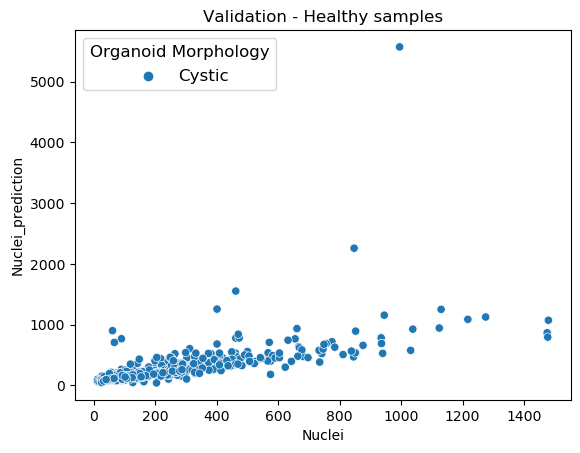

In [45]:
val_with_predications['Organoid Morphology'] = np.where(val_with_predications['Organoid Morphology'] == 0, 
                                                   'Cystic', 
                                                   val_with_predications['Organoid Morphology'])

val_with_predications['Organoid Morphology'] = np.where(val_with_predications['Organoid Morphology'] == '1', 
                                                   'Budded', 
                                                   val_with_predications['Organoid Morphology'])

val_with_predications['Sample type'] = np.where(val_with_predications['Sample type'] == 0, 
                                                   'Healthy', 
                                                   val_with_predications['Sample type'])

val_with_predications['Sample type'] = np.where(val_with_predications['Sample type'] == '1', 
                                                   'Tumour', 
                                                   val_with_predications['Sample type'])
# filter by sample_type
sn.scatterplot(data=val_with_predications.loc[val_with_predications['Sample type'] == 'Healthy'] , 
               x="Nuclei", 
               y="Nuclei_prediction",
               hue="Organoid Morphology").set(title='Validation - Healthy samples')


[Text(0.5, 1.0, 'Validation - Tumour samples')]

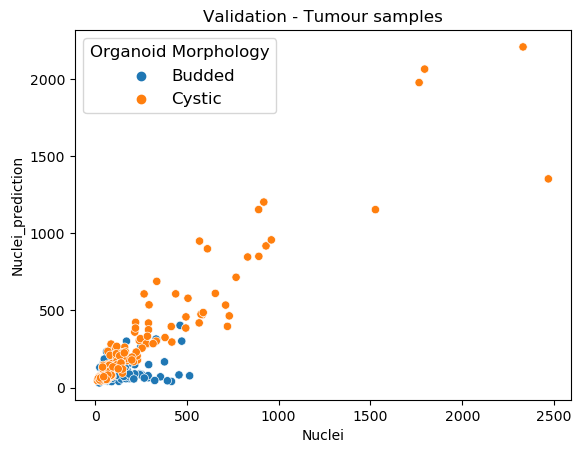

In [46]:
# filter by sample_type
sn.scatterplot(data=val_with_predications.loc[val_with_predications['Sample type'] == 'Tumour'] , 
               x="Nuclei", 
               y="Nuclei_prediction",
               hue="Organoid Morphology").set(title='Validation - Tumour samples')


In [49]:
val_with_predications

,Nuclei,Area (pixels),Sample type,Organoid Morphology,Nuclei_prediction,real_cell_number,real_cell_number_predicition,predicition_devition
0,356,944,Tumour,Budded,69.907659,0,8.084606e+69,-8.084606e+69
1,98,1414,Tumour,Budded,99.059456,0,1.146717e+99,-1.146717e+99
2,290,848,Tumour,Budded,63.953249,0,8.979439e+63,-8.979439e+63
3,67,503,Tumour,Budded,42.554589,0,3.585828e+42,-3.585828e+42
4,171,4668,Tumour,Budded,300.889133,0,7.746998e+300,-7.746998e+300
...,...,...,...,...,...,...,...,...
46,102,1843,Healthy,Cystic,135.348391,0,2.230441e+135,-2.230441e+135
47,59,1481,Healthy,Cystic,112.895304,0,7.857862e+112,-7.857862e+112
48,66,1471,Healthy,Cystic,112.275053,0,1.883881e+112,-1.883881e+112
49,40,1176,Healthy,Cystic,93.977649,0,9.498362e+93,-9.498362e+93


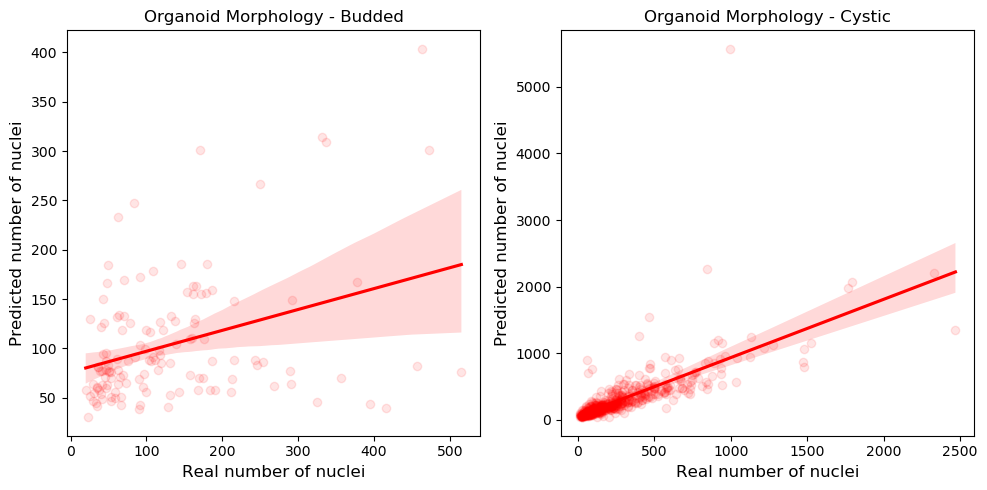

In [50]:
# plot deviation of predicted values from real values

val_with_predications['real_cell_number'] = val_with_predications['Nuclei'] 
val_with_predications['real_cell_number_predicition'] = val_with_predications['Nuclei_prediction'] 

val_with_predications['predicition_devition'] = val_with_predications['real_cell_number'] - val_with_predications['real_cell_number_predicition'] 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams['axes.grid'] = False
sn.regplot(data = val_with_predications[val_with_predications['Organoid Morphology'] == 'Budded'], x ='real_cell_number', y='real_cell_number_predicition', ax=axes[0], 
           color = 'red',scatter_kws= {'alpha': 0.1})
axes[0].set_xlabel('Real number of nuclei', fontsize=12)
axes[0].set_ylabel('Predicted number of nuclei', fontsize=12)
axes[0].set_title('Organoid Morphology - Budded', fontsize = 12)

sn.regplot(data = val_with_predications[val_with_predications['Organoid Morphology'] == 'Cystic'], x ='real_cell_number', y='real_cell_number_predicition', ax=axes[1], 
           color = 'red',scatter_kws= {'alpha': 0.1})
axes[1].set_xlabel('Real number of nuclei', fontsize=12)
axes[1].set_ylabel('Predicted number of nuclei', fontsize=12)
axes[1].set_title('Organoid Morphology - Cystic', fontsize = 12)
fig.tight_layout()
plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\validation_dataset_real_vs_predicted_number_of_nuclei.png', dpi=1200,bbox_inches = "tight")

,Nuclei,Area (pixels),Sample type,Organoid Morphology,Nuclei_prediction,real_cell_number,real_cell_number_predicition,predicition_devition
0,235,2874,Healthy,Cystic,199.296270,235,199.296270,35.703730
1,461,8214,Healthy,Cystic,530.510307,461,530.510307,-69.510307
2,775,11216,Healthy,Cystic,716.709659,775,716.709659,58.290341
3,564,6378,Healthy,Cystic,416.632222,564,416.632222,147.367778
4,35,836,Healthy,Cystic,72.889115,35,72.889115,-37.889115
...,...,...,...,...,...,...,...,...
46,102,1843,Healthy,Cystic,135.348391,102,135.348391,-33.348391
47,59,1481,Healthy,Cystic,112.895304,59,112.895304,-53.895304
48,66,1471,Healthy,Cystic,112.275053,66,112.275053,-46.275053
49,40,1176,Healthy,Cystic,93.977649,40,93.977649,-53.977649


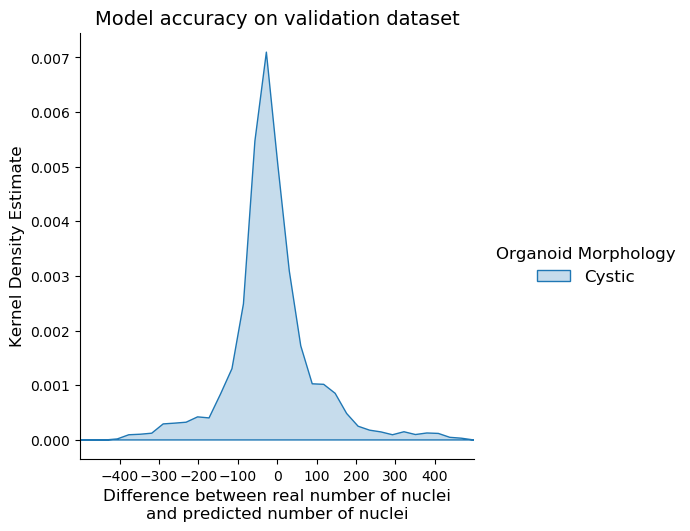

In [54]:
# Distriubtuions of model deviation



sn.displot(val_with_predications.loc[val_with_predications['Organoid Morphology'] == 'Cystic'], x="predicition_devition", 
           hue = 'Organoid Morphology',
           kind ='kde',
           bw_adjust=.25,
          fill = True)
plt.xlim(-500,500)
plt.xticks(np.arange(-400, 500, step=100))  # Set label locations.
plt.xlabel('Difference between real number of nuclei\nand predicted number of nuclei',fontsize=12)
plt.ylabel('Kernel Density Estimate',fontsize=12)
plt.title('Model accuracy on validation dataset',fontsize=14)

plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\validation_dataset_distribution_of_model_deviation.png', dpi=1200,bbox_inches = "tight")

# sn.displot(val_with_predications, x="predicition_devition", stat="density", bins = 40).set(title='Deviation of predicted number of cells from real number of cells')
# plt.xlim(-1000,1000)
# plt.xlabel('Deviation (number of cells)')
# plt.ylabel('Density')

In [101]:
# assess the deviation at the level of the entire well 

val_data_predictions_with_ID = val_with_predications.copy()

val_data_predictions_with_ID['Sample_ID'] = val_data['Sample_ID']
val_data_predictions_with_ID['Well'] = val_data['Well']


deviation_at_well_level = val_data_predictions_with_ID.groupby(['Sample_ID','Well','Organoid Morphology']).sum()

deviation_at_well_level['percentage_deviation'] = deviation_at_well_level['predicition_devition']/deviation_at_well_level['real_cell_number']




0.16168553875212816

In [154]:
1-deviation_at_well_level[deviation_at_well_level['Organoid Morphology'] == 'Budded']['percentage_deviation'].abs().mean()

0.7236703640245852

In [153]:
1-deviation_at_well_level[deviation_at_well_level['Organoid Morphology'] == 'Cystic']['percentage_deviation'].abs().mean()

0.8612432806925292

In [102]:
deviation_at_well_level = deviation_at_well_level.reset_index()
deviation_at_well_level

,Sample_ID,Well,Organoid Morphology,Nuclei,Area (pixels),Nuclei_prediction,real_cell_number,real_cell_number_predicition,predicition_devition,percentage_deviation
0,46T,1,Budded,77.892498,121.412338,75.120406,5657.0,3791.678581,1865.321419,0.329737
1,46T,2,Budded,81.881622,128.687099,80.891696,5615.0,4936.188623,678.811377,0.120892
2,46T,3,Budded,103.200367,158.380492,95.974084,6036.0,3752.221759,2283.778241,0.378360
3,86H,1,Cystic,62.796596,96.654921,63.725821,8719.0,11016.865206,-2297.865206,-0.263547
4,86H,2,Cystic,68.640238,103.945181,69.514300,12736.0,10920.765668,1815.234332,0.142528
5,86H,3,Cystic,31.389644,46.816769,30.940783,4459.0,3607.096132,851.903868,0.191053
6,86H,4,Cystic,61.789484,93.470757,62.678509,12031.0,9811.894361,2219.105639,0.184449
7,86T,1,Cystic,36.485210,53.074725,36.381297,10743.0,9287.516047,1455.483953,0.135482
8,86T,2,Cystic,59.248879,93.782102,62.309422,10816.0,10447.217183,368.782817,0.034096
9,86T,3,Cystic,25.418696,37.852003,25.237137,5281.0,4454.764194,826.235806,0.156454


In [110]:
barplot_df = pd.melt(deviation_at_well_level, id_vars=['Sample_ID','Well','Organoid Morphology'], value_vars=['real_cell_number', 'real_cell_number_predicition'])
barplot_df['id'] = barplot_df['Sample_ID'] + '_' + barplot_df['Well']
barplot_df = barplot_df.sort_values(by=['value'],ascending=False)


barplot_df['variable']= barplot_df['variable'].replace('real_cell_number', 'Real')
barplot_df['variable'] = barplot_df['variable'].replace('real_cell_number_predicition', 'Predicted')
barplot_df = barplot_df.rename(columns={'variable': 'Nuclei number type', 'oldName2': 'newName2'})
barplot_df

,Sample_ID,Well,Organoid Morphology,Nuclei number type,value,id
28,88H,1,Cystic,Predicted,21366.089478,88H_1
10,88H,1,Cystic,Real,18984.000000,88H_1
15,94H,1,Cystic,Real,16388.000000,94H_1
33,94H,1,Cystic,Predicted,13596.838887,94H_1
4,86H,2,Cystic,Real,12736.000000,86H_2
16,94H,2,Cystic,Real,12653.000000,94H_2
6,86H,4,Cystic,Real,12031.000000,86H_4
29,88H,2,Cystic,Predicted,11624.095225,88H_2
21,86H,1,Cystic,Predicted,11016.865206,86H_1
22,86H,2,Cystic,Predicted,10920.765668,86H_2


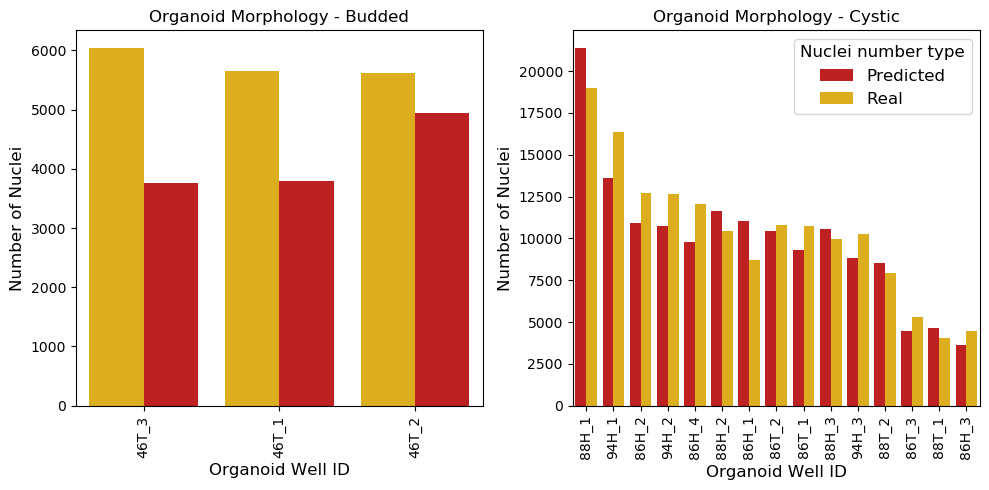

In [114]:
palette = {'Predicted': "#D80707", 'Real': "#FDBD00"}

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams['axes.grid'] = False
br_a = sn.barplot(data=barplot_df[barplot_df['Organoid Morphology'] == 'Budded'], 
                  x='id', 
                  y ='value', 
                  hue ='Nuclei number type',  
                  ax = axes[0],
                 palette = palette)
axes[0].set_xlabel('Organoid Well ID', fontsize=12)
axes[0].set_ylabel('Number of Nuclei', fontsize=12)
axes[0].set_title('Organoid Morphology - Budded', fontsize = 12)
br_a.legend_.remove()
for item in br_a.get_xticklabels():
    item.set_rotation(90)



br_b = sn.barplot(data=barplot_df[barplot_df['Organoid Morphology'] == 'Cystic'], 
                  x='id', 
                  y ='value', 
                  hue ='Nuclei number type',  
                  ax = axes[1],
                 palette = palette)
axes[1].set_xlabel('Organoid Well ID', fontsize=12)
axes[1].set_ylabel('Number of Nuclei', fontsize=12)
axes[1].set_title('Organoid Morphology - Cystic', fontsize = 12)
for item in br_b.get_xticklabels():
    item.set_rotation(90)

fig.tight_layout()
plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\well_level_accuracy_validation_dataset.png', dpi = 1200)

In [1]:
pancreatic_data = pd.read_csv(r'J:\241123_organoid_wells_analysis.csv')
pancreatic_data['Healthy_Tumour'] = pancreatic_data['Healthy_Tumour'].map({'Healthy': 'H', 'Tumour': 'T'})
pancreatic_data = pancreatic_data.loc[:, ~pancreatic_data.columns.str.contains('^Unnamed')]
pancreatic_data = pancreatic_data.loc[:, ~pancreatic_data.columns.str.contains('^Area')]

# split the organoid_id_brightfield to have a column which indicates which well an organoid is coming from
pancreatic_data['Well'] = pancreatic_data['Organoid_ID_Brightfield'].str.split('.',expand=True)[0]#

pancreatic_data = pancreatic_data[pancreatic_data['Organoid_ID_Detection'].notna()]
pancreatic_data = pancreatic_data[pancreatic_data.Nuclei != 'ND']
pancreatic_data = pancreatic_data[pancreatic_data.Organoid_ID_Detection != '??']
pancreatic_data = pancreatic_data[pancreatic_data.Organoid_ID_Detection != 'na']
pancreatic_data = pancreatic_data.rename(columns={'Organoid_ID_Detection': 'Organoid_ID'})
# fix error
pancreatic_data.Organoid_ID = pancreatic_data.Organoid_ID.astype(int)
pancreatic_data.Nuclei = pancreatic_data.Nuclei.astype(int)

# pancreatic dataset 

pancreatic_csv_paths = [x for x in glob.glob(r"E:\mask_rcnn\MLR_model\pancreatic_area_datasets\*.csv")]


pan_list = []

for csv in pancreatic_csv_paths:
    sample_id = csv.split('\\')[4].split('_')[0]
    well =csv.split('\\')[4].split('_')[1].split(' ')[0][-1]
    sample_areas = pd.read_csv(csv)
    temp_df = pd.merge(pancreatic_data[pancreatic_data.Patient_ID.isin([sample_id])][pancreatic_data.Well.isin([well])], sample_areas, on=['Organoid_ID'])
    pan_list.append(temp_df)

pancreatic_data_full = pd.concat(pan_list, axis=0)
pancreatic_data_full


NameError: name 'pd' is not defined

In [58]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
filename = r'E:\mask_rcnn\MLR_model\mlr_model.sav'
#load model from disk
loaded_model = pickle.load(open(filename, 'rb'))

sample_type = pd.get_dummies(pancreatic_data_full['Healthy_Tumour'])
organoid_type  = pd.get_dummies(pancreatic_data_full['Morphology'])

pancreatic_data_full['Dummy_tissue_type'] = sample_type['T']
pancreatic_data_full['Dummy_morphology'] = 0


pancreatic_data_numerical = pancreatic_data_full.drop(['Well', 'Patient_ID','Healthy_Tumour',
                                     'Morphology','Organoid_ID_Brightfield',
                                    'Organoid_ID'], axis=1)
pancreatic_data_numerical = pancreatic_data_full.rename(columns={"Dummy_morphology": "Organoid Morphology", "Dummy_tissue_type": "Sample type"})

pancreatic_data_numerical['Area (pixels)'] = np.log10(pancreatic_data_numerical['Area (pixels)']) 
pancreatic_data_numerical['Nuclei'] = np.log10(pancreatic_data_numerical['Nuclei']) 

x = pancreatic_data_numerical[['Area (pixels)', 'Sample type', 'Organoid Morphology']]
# add constant
# with statsmodels
x = sm.add_constant(x,has_constant='add') # adding a constant
pancreatic_predictions = loaded_model.predict(x) 


pancreatic_with_predications = pd.concat([pancreatic_data_numerical, pancreatic_predictions], axis = 1)
pancreatic_with_predications = pancreatic_with_predications.rename(columns={0: "Nuclei_prediction"})


pancreatic_with_predications['Organoid Morphology'] = np.where(pancreatic_with_predications['Organoid Morphology'] == 0, 
                                                   'Cystic', 
                                                   pancreatic_with_predications['Organoid Morphology'])

pancreatic_with_predications['Organoid Morphology'] = np.where(pancreatic_with_predications['Organoid Morphology'] == 1, 
                                                   'Budded', 
                                                   pancreatic_with_predications['Organoid Morphology'])

pancreatic_with_predications['Sample type'] = np.where(pancreatic_with_predications['Sample type'] == 0, 
                                                   'Healthy', 
                                                   pancreatic_with_predications['Sample type'])

pancreatic_with_predications['Sample type'] = np.where(pancreatic_with_predications['Sample type'] == '1', 
                                                   'Tumour', 
                                                   pancreatic_with_predications['Sample type'])

pancreatic_with_predications

,Patient_ID,Healthy_Tumour,Morphology,Organoid_ID_Brightfield,Organoid_ID,Nuclei,Well,Area (pixels),Sample type,Organoid Morphology,Nuclei_prediction
0,PM030,T,Cystic,1.1.1,104,2.911158,1,4.055072,Tumour,Cystic,2.773062
1,PM030,T,Cystic,1.1.2,136,2.139879,1,3.363800,Tumour,Cystic,2.134362
2,PM030,T,Cystic,1.1.3,137,2.678518,1,3.779813,Tumour,Cystic,2.518736
3,PM030,T,Cystic,1.1.5,99,2.829947,1,4.008430,Tumour,Cystic,2.729966
4,PM030,T,Cystic,1.1.6,132,2.143015,1,3.326336,Tumour,Cystic,2.099747
...,...,...,...,...,...,...,...,...,...,...,...
9,PM038,T,Cystic,4.3.3,5,1.863323,4,3.066326,Tumour,Cystic,1.859511
10,PM038,T,Cystic,4.3.4,9,2.068186,4,3.223755,Tumour,Cystic,2.004968
11,PM038,T,Cystic,4.3.5,6,1.380211,4,3.273927,Tumour,Cystic,2.051323
12,PM038,T,Cystic,4.3.6,2,2.033424,4,2.961421,Tumour,Cystic,1.762584


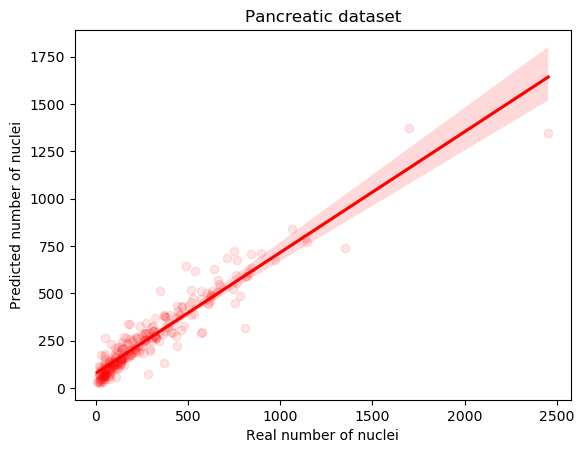

In [60]:
# plot deviation of predicted values from real values

pancreatic_with_predications['real_cell_number'] = 10 ** pancreatic_with_predications['Nuclei'] 
pancreatic_with_predications['real_cell_number_predicition'] = 10 ** pancreatic_with_predications['Nuclei_prediction'] 

pancreatic_with_predications['predicition_devition'] = pancreatic_with_predications['real_cell_number'] - pancreatic_with_predications['real_cell_number_predicition'] 


sn.regplot(data = pancreatic_with_predications, 
           x ='real_cell_number', 
           y='real_cell_number_predicition',
           color = 'red',
           scatter_kws= {'alpha': 0.1})
plt.xlabel('Real number of nuclei')
plt.ylabel('Predicted number of nuclei')
plt.title('Pancreatic dataset')


plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\pancreatic_dataset_real_vs_predicted_number_of_nuclei.png', dpi=1200,bbox_inches = "tight")

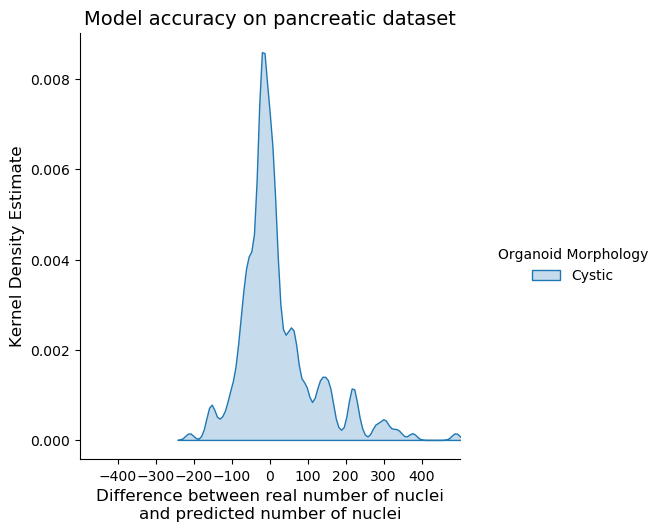

In [61]:
# Distriubtuions of model deviation

sn.displot(pancreatic_with_predications, x="predicition_devition", 
           hue = 'Organoid Morphology',
           kind ='kde',
           bw_adjust=.25,
          fill = True)
plt.xlim(-500,500)
plt.xticks(np.arange(-400, 500, step=100))  # Set label locations.
plt.xlabel('Difference between real number of nuclei\nand predicted number of nuclei',fontsize=12)
plt.ylabel('Kernel Density Estimate',fontsize=12)
plt.title('Model accuracy on pancreatic dataset',fontsize=14)

plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\pancreatic_dataset_distribution_of_model_deviation.png', dpi=1200,bbox_inches = "tight")


In [67]:
# assess the deviation at the level of the entire well 

pancreatic_deviation_at_well_level = pancreatic_with_predications.groupby(['Patient_ID','Well']).sum()

pancreatic_deviation_at_well_level['percentage_deviation'] = pancreatic_deviation_at_well_level['predicition_devition']/pancreatic_deviation_at_well_level['real_cell_number']

pancreatic_deviation_at_well_level = pancreatic_deviation_at_well_level.reset_index()

pancreatic_barplot_df = pd.melt(pancreatic_deviation_at_well_level, id_vars=['Patient_ID','Well'], value_vars=['real_cell_number', 'real_cell_number_predicition'])
pancreatic_barplot_df['id'] = pancreatic_barplot_df['Patient_ID'] + '_' + pancreatic_barplot_df['Well']
pancreatic_barplot_df = pancreatic_barplot_df.sort_values(by=['value'],ascending=False)



pancreatic_barplot_df['variable']= pancreatic_barplot_df['variable'].replace('real_cell_number', 'Real')
pancreatic_barplot_df['variable'] = pancreatic_barplot_df['variable'].replace('real_cell_number_predicition', 'Predicted')
pancreatic_barplot_df = pancreatic_barplot_df.rename(columns={'variable': 'Nuclei number type', 'oldName2': 'newName2'})
pancreatic_barplot_df


,Patient_ID,Well,Nuclei number type,value,id
0,PM030,1,Real,23597.000000,PM030_1
8,PM030,1,Predicted,18741.187886,PM030_1
1,PM030,2,Real,15315.000000,PM030_2
9,PM030,2,Predicted,14295.551093,PM030_2
2,PM030,3,Real,10915.000000,PM030_3
10,PM030,3,Predicted,10070.800634,PM030_3
3,PM030,4,Real,9316.000000,PM030_4
11,PM030,4,Predicted,7022.091615,PM030_4
12,PM038,1,Predicted,5696.334964,PM038_1
13,PM038,2,Predicted,5558.486240,PM038_2


In [146]:
1-pancreatic_deviation_at_well_level['percentage_deviation'].abs().mean()


0.8346629347939797

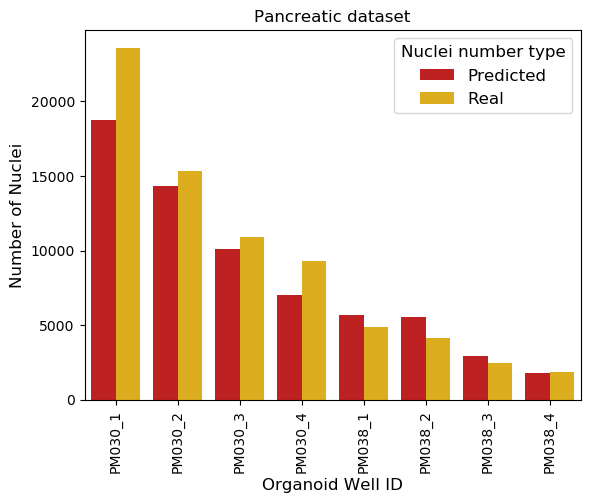

In [119]:
palette = {'Predicted': "#D80707", 'Real': "#FDBD00"}
hue_order = ['Predicted', 'Real']

br_a = sn.barplot(data=pancreatic_barplot_df, 
                  x='id', 
                  y ='value', 
                  hue ='Nuclei number type',
                  hue_order = hue_order,
                 palCell_countette = palette)
plt.xlabel('Organoid Well ID', fontsize=12)
plt.ylabel('Number of Nuclei', fontsize=12)
plt.title('Pancreatic dataset', fontsize = 12)

for item in br_a.get_xticklabels():
    item.set_rotation(90)

plt.savefig(r'E:\mask_rcnn\MLR_model\figure_outputs\well_level_accuracy_pancreatic_dataset.png', dpi = 1200)

In [4]:

well_1_data

,ID,Morphology,Tissue_type,Organoid_ID,Area (pixels)
0,W1,Cystic,Tumour,0,3795
1,W1,Cystic,Tumour,1,4397
2,W1,Cystic,Tumour,2,760
3,W1,Cystic,Tumour,3,1628
4,W1,Cystic,Tumour,4,1293
...,...,...,...,...,...
814,W2,Cystic,Tumour,394,2865
815,W2,Cystic,Tumour,395,4540
816,W2,Cystic,Tumour,396,7302
817,W2,Cystic,Tumour,397,1483


In [5]:

import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd

data = pd.read_csv(r'H:\combined_counts.csv')
data['Dummy_tissue_type'] = data['Tissue_type'].map({'Healthy':0, 'Tumour':1})
data['Dummy_morphology'] = data['Morphology'].map({'Cystic':0, 'Budded':1})

filename = r'E:\mask_rcnn\MLR_model\mlr_model.sav'
#load model from disk
loaded_model = pickle.load(open(filename, 'rb'))


data_pre_analysis= data.drop(['Tissue_type',
                                     'Morphology',
                                    'Organoid_ID'], axis=1)


import numpy as np
data_pre_analysis = data_pre_analysis.rename(columns={"Dummy_morphology": "Organoid Morphology", "Dummy_tissue_type": "Sample type"})
#data_pre_analysis['Area (pixels)'] = np.log10(data_pre_analysis['Area (pixels)']) 
data_pre_analysis

,Well_ID,Area (pixels),Sample type,Organoid Morphology
0,Well_1,21018,1,1
1,Well_1,5885,1,1
2,Well_1,4456,1,1
3,Well_1,5816,1,1
4,Well_1,1325,1,1
...,...,...,...,...
11709,Well_8,3438,1,1
11710,Well_8,13464,1,1
11711,Well_8,2165,1,1
11712,Well_8,2136,1,1


In [6]:

x = data_pre_analysis[['Area (pixels)', 'Sample type', 'Organoid Morphology']]
# add constant
# with statsmodels
x = sm.add_constant(x,has_constant='add') # adding a constant
predictions = loaded_model.predict(x) 

#well_1_data_pre_analysis['ID'] = well_1_data['ID']
data_pre_analysis['cell_number'] = predictions
#data_pre_analysis['Area (pixels)'] = 10**data_pre_analysis['Area (pixels)']
#data_pre_analysis['cell_number'] = 10**data_pre_analysis['cell_number']

data_pre_analysis.groupby('Well_ID').sum().drop(['Sample type','Organoid Morphology'], axis=1)

,Area (pixels),cell_number
Well_ID,,
Well_1,6184556,400256.907050
Well_2,6123221,395918.867202
Well_3,6156593,397920.633076
Well_4,6183204,399309.995859
Well_5,6209540,402885.358732
Well_6,6758681,437036.732209
Well_7,5554745,359398.574126
Well_8,6877350,444522.104474


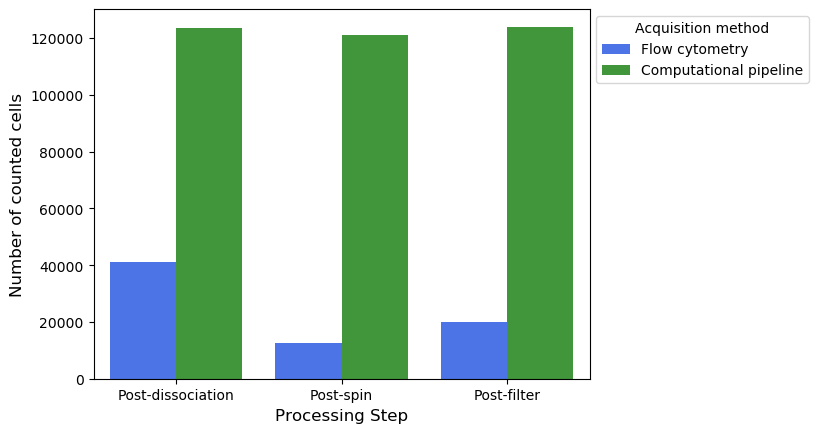

In [26]:
# Figures comparing the cell counting in flow cytometry and the cell counting pipeline

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

palette = {'Flow cytometry': "#3368FF", 'Computational pipeline': "#34A52C"}
hue_order = ['Flow cytometry', 'Computational pipeline']

# first compare the different steps

different_steps = pd.read_csv(r'E:\Organoid_Images\051223_cellcount_comparisons.csv')

different_steps["Cell_count"] = pd.to_numeric(different_steps["Cell_count"])

ax = sn.barplot(data=different_steps, 
                  x='Step', 
                  y ='Cell_count', 
                  hue ='Acquisition method',
                hue_order = hue_order,
                palette = palette)
plt.xlabel('Processing Step', fontsize=12)
plt.ylabel('Number of counted cells', fontsize=12)
sn.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Number of counted cells')

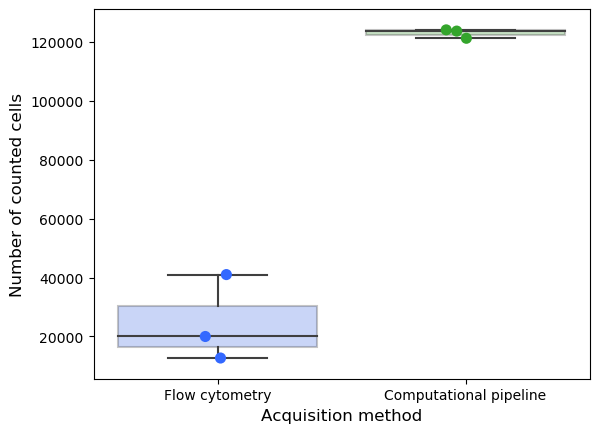

In [82]:
sn.boxplot(data=different_steps, 
                  x='Acquisition method', 
                  y ='Cell_count',
                hue_order = hue_order,
                palette = palette,
            boxprops=dict(alpha=.3))
sn.stripplot(data=different_steps, 
                  x='Acquisition method', 
                  y ='Cell_count',
                hue_order = hue_order,
                palette = palette, size=8)
plt.xlabel('Acquisition method', fontsize=12)
plt.ylabel('Number of counted cells', fontsize=12)

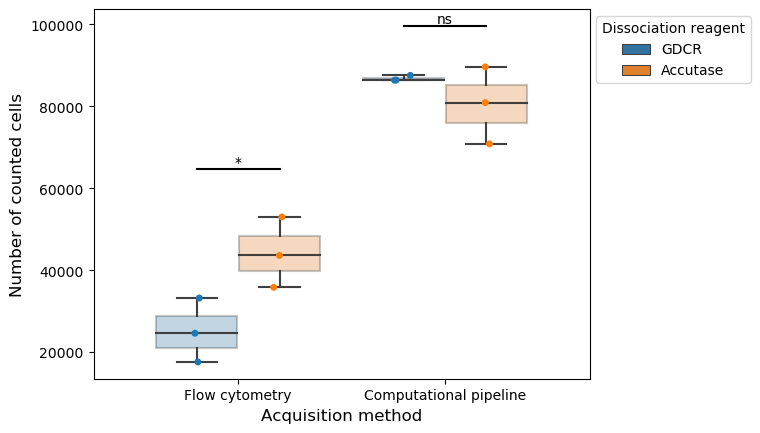

In [131]:
different_treatments = pd.read_csv(r'E:\Organoid_Images\121223_cellcount_treatment_comparisons.csv')

ax2 = sn.stripplot(data=different_treatments, 
                x = 'Acquisition method',
                  hue='Dissociation Reagent', 
                  y ='Count',
            dodge=True)
ax = sn.boxplot(data=different_treatments, 
                x = 'Acquisition method',
                  hue='Dissociation Reagent', 
                  y ='Count',
            boxprops=dict(alpha=.3))



x1, x2 = 0.8, 1.2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = different_treatments['Count'].max() + 10000, 2, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x3, x4 = -0.2, 0.2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = different_treatments['Count'].max() - 25000, 2, 'k'

plt.plot([x3, x3, x4, x4], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x3+x4)*.5, y+h, "*", ha='center', va='bottom', color=col)

plt.xlabel('Acquisition method', fontsize=12)
plt.ylabel('Number of counted cells', fontsize=12)


# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Dissociation reagent')
sn.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [ ]:
sn.boxplot(data=different_treatments, 
                  x='Acquisition method', 
                  y ='treatment_differences',
                hue_order = hue_order,
                palette = palette,
            boxprops=dict(alpha=.3))

In [90]:
from scipy import stats
rvs1 = [33200,24600,17600]

rvs2 = [43600,53000,35800]

stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-2.829977983919581, pvalue=0.04734610797966663)

In [91]:
rvs1 = [86407,87545,86368]

rvs2 = [89619,80899,70817]

stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=1.1619912818295244, pvalue=0.30984678927013265)